In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input,Lambda
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Convolution2D,AveragePooling2D,MaxPooling2D,Conv2D
from keras.layers.core import Flatten
from keras.optimizers import SGD,Adam
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import numpy as np
from PIL import Image,ImageOps
import argparse
import math
import os
import os.path
import glob
from keras.models import Model
from keras import backend as K
from keras import objectives
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical

C:\Users\user\Anaconda3\actual_anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('labels.csv')

In [3]:
#i=ImageDataGenerator()

In [4]:
df

,Unnamed: 0,Image,Category
0,NaN,0,NEUTROPHIL
1,NaN,1,NEUTROPHIL
2,NaN,2,NEUTROPHIL
3,NaN,3,NEUTROPHIL
4,NaN,4,NEUTROPHIL
5,NaN,5,NEUTROPHIL
6,NaN,6,NEUTROPHIL
7,NaN,7,NEUTROPHIL
8,NaN,8,BASOPHIL
9,NaN,9,EOSINOPHIL


In [5]:
img=Image.open("BloodImage_00001.jpg")

In [6]:
print(img.category)

0


In [137]:
def defining_model():
    
    model=Sequential()
    model.add(Conv2D(32,(3,3),input_shape=(500,400,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.summary()

          

In [48]:
#(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [49]:
#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#x_train.shape

In [50]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [51]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
train=train_datagen.flow_from_directory(directory="Untitled Folder 2", target_size=(500, 400), color_mode='rgb', classes=None,
                                        class_mode='binary', batch_size=32, shuffle=True, seed=None,
                                        save_to_dir=None, save_prefix='', save_format='jpg',
                                        follow_links=False, subset=None, interpolation='nearest')

Found 257 images belonging to 6 classes.


In [52]:
test_datagen = ImageDataGenerator(rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2)


In [53]:
test=test_datagen.flow_from_directory(directory="Untitled Folder 1", target_size=(500, 400), color_mode='rgb', classes=None,
                                        class_mode='binary', batch_size=32 )

Found 143 images belonging to 6 classes.


In [54]:
model.fit_generator(generator=train, steps_per_epoch=32, epochs=5, verbose=1, validation_data=test)

Epoch 1/5
32/32 [==============================] - 816s 25s/step - loss: -36.4903 - acc: 0.0932 - val_loss: -24.0808 - val_acc: 0.2797
Epoch 2/5
32/32 [==============================] - 3913s 122s/step - loss: -38.5357 - acc: 0.1019 - val_loss: -24.0808 - val_acc: 0.2797
Epoch 3/5
32/32 [==============================] - 6487s 203s/step - loss: -35.9505 - acc: 0.1558 - val_loss: -24.0808 - val_acc: 0.2797
Epoch 4/5
32/32 [==============================] - 809s 25s/step - loss: -38.3952 - acc: 0.1028 - val_loss: -24.0808 - val_acc: 0.2797
Epoch 5/5
32/32 [==============================] - 838s 26s/step - loss: -37.5901 - acc: 0.0853 - val_loss: -24.0808 - val_acc: 0.2797


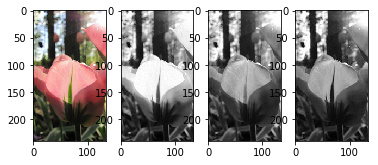

In [57]:
from pylab import *

img = imread('21084139365_f44cd2a685_n.jpg')
from skimage import img_as_float
img = img_as_float(img)
w, h = img.shape[:2]
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
figure()
gray()
subplot(1,4,1); imshow(img)
subplot(1,4,2); imshow(R)
subplot(1,4,3); imshow(G)
subplot(1,4,4); imshow(B)
show()   

In [77]:
pred=model.predict_generator(generator=train, steps=32, max_queue_size=10,
                        workers=1, use_multiprocessing=False, verbose=1)


32/32 [==============================] - 296s 9s/step


In [108]:
print ("pred={}".format(pred.T))
model.save_weights('first_try.h5')

pred=[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [140]:
eval=model.evaluate_generator(train,steps=32)

In [120]:
from keras.utils import plot_model,print_summary
print_summary(model)
#plot_model(model, to_file='model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 498, 398, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 249, 199, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 247, 197, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 123, 98, 32)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 121, 96, 32)       9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 48, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 92160)             0         
__________

In [115]:
#plot_model(model, to_file='model.jpg')
import pydot_ng as pydot

In [133]:
print(pydot.Common())



['graph', 'subgraph', 'digraph', 'node', 'edge', 'strict']

In [135]:
plot_model(pred,to_file='myfile.png')

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [122]:
pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

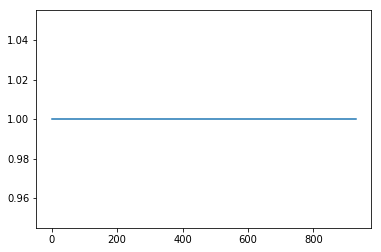

In [139]:
plt.plot(pred)